# Text Representation

How do we transform a given text into numerical form so that it can be fed into NLP and ML algorithms? In NLP parlance, this <b> conversion of raw text to a suitable numerical form </b> is called text representation.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Text-Representation" data-toc-modified-id="Text-Representation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Text Representation</a></span><ul class="toc-item"><li><span><a href="#Basic-Vectorization-Approaches" data-toc-modified-id="Basic-Vectorization-Approaches-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basic Vectorization Approaches</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>One-Hot Encoding</a></span><ul class="toc-item"><li><span><a href="#One---Hot-Encoding-from-scratch" data-toc-modified-id="One---Hot-Encoding-from-scratch-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>One - Hot Encoding from scratch</a></span></li><li><span><a href="#One---Hot-Encoding-from-using-sklearn" data-toc-modified-id="One---Hot-Encoding-from-using-sklearn-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>One - Hot Encoding from using sklearn</a></span></li><li><span><a href="#One---Hot-Encoding-Pros-and-Cons:" data-toc-modified-id="One---Hot-Encoding-Pros-and-Cons:-1.1.1.3"><span class="toc-item-num">1.1.1.3&nbsp;&nbsp;</span>One - Hot Encoding Pros and Cons:</a></span></li></ul></li><li><span><a href="#Bag-of-words-(BoW)" data-toc-modified-id="Bag-of-words-(BoW)-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Bag of words (BoW)</a></span><ul class="toc-item"><li><span><a href="#Advantages-and-Disadvantages-of-BoW" data-toc-modified-id="Advantages-and-Disadvantages-of-BoW-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Advantages and Disadvantages of BoW</a></span></li></ul></li><li><span><a href="#Bag-of-N-Grams" data-toc-modified-id="Bag-of-N-Grams-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Bag of N-Grams</a></span><ul class="toc-item"><li><span><a href="#Pros-and-Cons-of-n-grams" data-toc-modified-id="Pros-and-Cons-of-n-grams-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>Pros and Cons of n grams</a></span></li></ul></li><li><span><a href="#Term-frequency–inverse-document-frequency-(TF-IDF)" data-toc-modified-id="Term-frequency–inverse-document-frequency-(TF-IDF)-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Term frequency–inverse document frequency (TF-IDF)</a></span></li></ul></li></ul></li></ul></div>

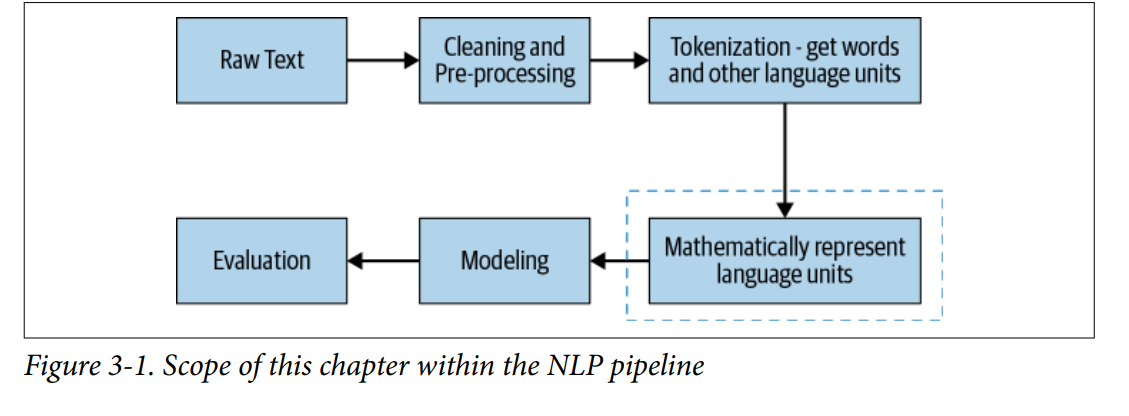

Text representation has been an active area of research in the past decades, especially the last one. In this chapter, we’ll start with simple approaches and go all the way to state-of-the-art techniques for representing text. These approaches are classified into four categories:
1. Basic vectorization approaches
    - One-hot encoding
    - Bag of words
    - Bag of N-Grams 
    - TF-IDF
2. Distributed representations
    - Word Embeddings
3. Universal language representation
4. Handcrafted features

The semantics (meaning) of the sentence arises from the combination of the following points. Thus, any good text representation scheme must facilitate the extraction of those data points in the best possible way to reflect the linguistic properties of the text. Without this, a text representation scheme isn’t of much use.

1. Break the sentence into lexical units such as lexemes, words, and phrases
2. Derive the meaning for each of the lexical units
3. Understand the syntactic (grammatical) structure of the sentence
4. Understand the context in which the sentence appears


## Basic Vectorization Approaches

To represent text data using vectors, <b> a basic approach is to assign a unique ID (integer value) to each word in the vocabulary (V) </b> of the text corpus, and then represent each sentence or document in the corpus as a V-dimensional vector. To illustrate this concept, a toy corpus with four documents (D1, D2, D3, and D4) is used as an example:


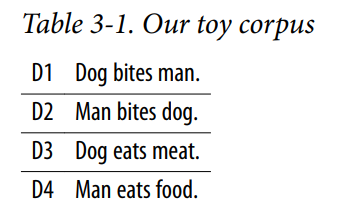

The vocabulary of the corpus is composed of six words (dog, bites, man, eats, meat, food), and every document can be represented by a vector of size six by assigning a unique integer value to each word in the vocabulary. The text is assumed to be pre-processed and tokenized, and the first method discussed for vector representation is one-hot encoding

### One-Hot Encoding

Let’s understand this via our toy corpus. We first map each of the six words to uniqueIDs: 

dog = 1, bites = 2, man = 3, meat = 4 , food = 5, eats = 6. 

Let’s consider the document D1: “dog bites man”. As per the scheme, each word is a six-dimensional vector. Dog is represented as [1 0 0 0 0 0], as the word “dog” is mapped to ID 1. 

Bites is represented as [0 1 0 0 0 0], and so on and so forth. 

man: [0 0 1 0 0 0]

Thus, D1 is represented as [[1 0 0 0 0 0] [0 1 0 0 0 0] [0 0 1 0 0 0]]. 

<font color = 'red'> D2 is represented as: </font>

Other documents in the corpus can be represented similarly

#### One - Hot Encoding from scratch

In [1]:
def build_vocab(docs):
    # Initialize an empty dictionary to store the vocabulary
    vocab = {}

    # Loop over each document in the corpus
    for doc in docs:

        # Split the document into individual words
        for word in doc.split():

            # Check if the word is already in the vocabulary
            if word not in vocab:
                # If the word is not in the vocabulary, add it with a new ID
                vocab[word] = len(vocab) + 1

    # Return the vocabulary
    return vocab


In [2]:
def get_onehot_vector(docs, somestring):
    vocab = build_vocab(docs)
    print(vocab)
    onehot_encoded = []
    for word in somestring.split():
        temp = [0]*len(vocab)
        if word in vocab:
            print(word)
            temp[vocab[word]-1] = 1
            print(temp)
        onehot_encoded.append(temp)
    return onehot_encoded

In [3]:
documents = ['Dog bites man.', 'Man bites dog.', 'Dog eats meat.', 'Man eats food.']
processed_docs = [doc.lower().replace(".","") for doc in documents]
print(processed_docs)
one_hot_1 = get_onehot_vector(processed_docs, processed_docs[1])
one_hot_2 = get_onehot_vector(processed_docs, 'The dog loves food')
print(one_hot_1)
print(one_hot_2)

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']
{'dog': 1, 'bites': 2, 'man': 3, 'eats': 4, 'meat': 5, 'food': 6}
man
[0, 0, 1, 0, 0, 0]
bites
[0, 1, 0, 0, 0, 0]
dog
[1, 0, 0, 0, 0, 0]
{'dog': 1, 'bites': 2, 'man': 3, 'eats': 4, 'meat': 5, 'food': 6}
dog
[1, 0, 0, 0, 0, 0]
food
[0, 0, 0, 0, 0, 1]
[[0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1]]


#### One - Hot Encoding from using sklearn

In [4]:
# Homework (please add comments to your code)

#### One - Hot Encoding Pros and Cons:

Pros:

- Intuitive and straightforward to implement.

Cons:

- Size of one-hot vectors is directly proportional to vocabulary size, which can result in sparse representations that are computationally inefficient to store, compute with, and learn from.

- One-hot encoding treats words as atomic units and does not capture similarity or dissimilarity between words, resulting in poor semantic representation of words.

- One-hot encoding is unable to handle out-of-vocabulary (OOV) words, which requires retraining the model with the new word and expanding the vocabulary.

### Bag of words (BoW) 

Bag of words (BoW) is a classical text representation technique that has been used commonly in NLP, especially in text classification problems. 
The key idea behind it is as follows: represent the text under consideration as a bag (colletion) of words while <b> ignoring the order and context </b>.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Data
documents = ['Dog bites man.', 'Man bites dog.', 'Dog eats meat.', 'Man eats food.']
processed_docs = [doc.lower().replace(".","") for doc in documents]

count_vect = CountVectorizer(binary = True)

#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#See the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':",temp.toarray())

Our vocabulary:  {'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}
BoW representation for 'dog bites man':  [[1 1 0 0 1 0]]
BoW representation for 'man bites dog:  [[1 1 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 1 0 0 0 0]]


In the above code, we represented the text considering the frequency of words into account. However, sometimes, we don't care about frequency much, but only want to know whether a word appeared in a text or not. That is, each document is represented as a vector of 0s and 1s. We will use the option binary=True in CountVectorizer for this purpose.

In [6]:
#BoW with binary vectors
count_vect = CountVectorizer(binary=True)
count_vect.fit(processed_docs)
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Bow representation for 'dog and dog are friends': [[0 1 0 0 0 0]]


#### Advantages and Disadvantages of BoW

Advantages of Bag of Words (BoW) encoding:

- Simple to understand and implement.
- Documents with similar vocabulary are closer in Euclidean space, capturing semantic similarity.
- Fixed-length encoding for arbitrary length sentences.


Disadvantages of Bag of Words (BoW) encoding:

- Vector size increases with vocabulary size, causing sparsity issues.
- Does not capture similarity between different words that mean the same thing.
- Cannot handle out-of-vocabulary words.
- Ignores word order, resulting in the same representation for different word orderings.

Despite these limitations, BoW is commonly used in text classification and other NLP problems due to its simplicity and ease of implementation.

### Bag of N-Grams


<b> All the representation schemes we’ve seen so far treat words as independent units </b>

- BoN considers chunks of n contiguous words (or tokens) to capture context and word order.
- Each chunk is called an n-gram and the corpus vocabulary is a collection of all unique n-grams.
- Each document is represented by a vector of length |V|, containing frequency counts of n-grams present in the document and zero for absent n-grams.

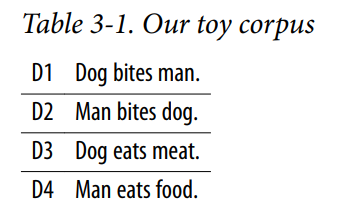

In [7]:
# Construct set of 2-grams(bigrams) for the above table:
# Dog bites man (n = 2)
# D1 {dog bites, bites man}
# D2 {man bites, bites dog}
# D3 = {dog eats, eats meat}
# D4 = {man eats, eats food}
# n= 3
# dog bites man 
# Representation of D1

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

#Ngram vectorization example with count vectorizer and uni, bi, trigrams
count_vect = CountVectorizer(ngram_range=(2,2))

#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog bites': 2, 'bites man': 1, 'man bites': 6, 'bites dog': 0, 'dog eats': 3, 'eats meat': 5, 'man eats': 7, 'eats food': 4}
BoW representation for 'dog bites man':  [[0 1 1 0 0 0 0 0]]
BoW representation for 'man bites dog:  [[1 0 0 0 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 0 0 0 0 0]]


#### Pros and Cons of n grams

Pros:

- BoN captures some context and word-order information in the form of n-grams.
- The resulting vector space is able to capture some semantic similarity. Documents having the same n-grams will have their vectors closer to each other in Euclidean space as compared to documents with completely different n-grams.

Cons:

- As n increases, dimensionality (and therefore sparsity) only increases rapidly.
- It still provides no way to address the out-of-vocabulary (OOV) problem.

### Term frequency–inverse document frequency (TF-IDF)

It’s a commonly used representation scheme for <b> information-retrieval systems </b>, for extracting relevant documents from a
corpus for a given text query

The method calculates two values for each word: 

- term frequency (TF), which is the number of times the word appears in the document
- and inverse document frequency (IDF), which measures how common or rare the word is in the entire corpus. 

These values are then combined to give a score that indicates the importance of the word in the document.

<b> TF of a term t in a document d is defined as:</b>


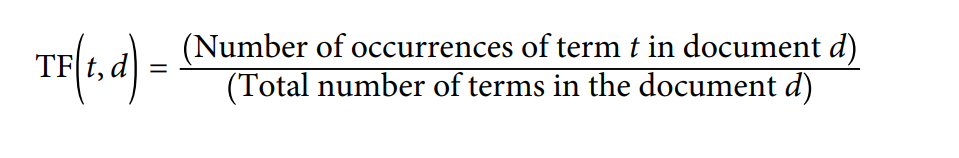

<b> IDF (inverse document frequency) </b>

IDF (inverse document frequency) measures the importance of the term across a corpus. In computing TF, all terms are given equal importance (weightage). 

However, it’s a well-known fact that stop words like is, are, am, etc., are not important, even though
they occur frequently. 

To account for such cases, <b> IDF weighs down the terms that are very common across a corpus </b> and weighs up the rare terms. IDF of a term t is calculated as follows:

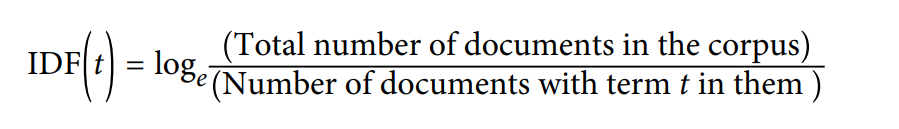

<b> TF-IDF score = TF * IDF </b>

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(processed_docs)
print(tfidf.idf_) #IDF for all words in the vocabulary
print(tfidf.get_feature_names()) #All words in the vocabulary.
temp = tfidf.transform(["dog and man are friends"])
print("Tfidf representation for 'dog and man are friends':\n", temp.toarray())

[1.51082562 1.22314355 1.51082562 1.91629073 1.51082562 1.91629073]
['bites', 'dog', 'eats', 'food', 'man', 'meat']
Tfidf representation for 'dog and man are friends':
 [[0.         0.62922751 0.         0.         0.77722116 0.        ]]
